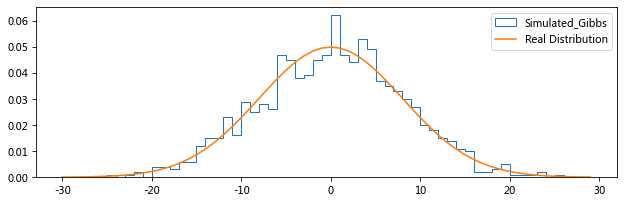

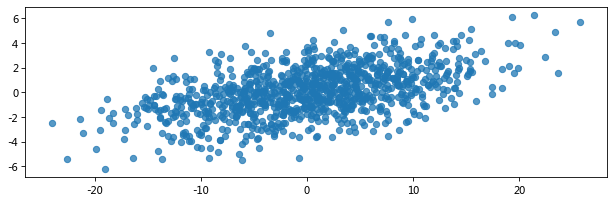

In [3]:
# -*- coding: utf-8 -*-
import pylab as pl
import numpy as np
import math
sigma_x = 8 # x维度正态分布的标准差
sigma_y = 2 # y维度正态分布的标准差
cov = 0.5 # x和y的相关系数
def pdf_gaussian_x(x):
    # x维度的概率密度函数
    return (1 / (math.sqrt(2 * math.pi) * sigma_x)) * math.exp(-math.pow(x, 2) / (2 * math.pow(sigma_x, 2)))
def pxgiveny(y):
    # 条件分布 p(x|y)
    return np.random.normal(y * (sigma_x/sigma_y) * cov, sigma_x * math.sqrt(1 - cov * cov))
def pygivenx(x):
    # 条件分布 p(y|x)
    return np.random.normal(x * (sigma_y/sigma_x) * cov, sigma_y * math.sqrt(1 - cov * cov))

def gibbs(N_hop):
    #随机初始化x和y状态
    x_states = []
    y_states = []
    x = np.random.uniform()
    y = np.random.uniform()
    for _ in range(N_hop):
        x = pxgiveny(y) #根据y采样x
        y = pygivenx(x) #根据x采样y
        x_states.append(x)
        y_states.append(y)
    return x_states[-1000:], y_states[-1000:]

def plot_gibbs():
    #gibbs采样
    x_sample, y_sample = gibbs(100000)
    fig1 = pl.figure(num='fig1', figsize=(10, 3), dpi=75, facecolor='#FFFFFF', edgecolor='#0000FF')
    x1 = np.arange(-30, 30, 1)
    #x一维维度采样样本的直方图
    pl.hist(x_sample, density=True, bins=x1, histtype='step', label="Simulated_Gibbs")
#     plt.hist(x_res, num_bins, normed=1, facecolor='green', alpha=0.5)
#     plt.hist(y_res, num_bins, normed=1, facecolor='red', alpha=0.5)
    px1 = np.zeros(len(x1))
    for i in range(len(x1)):
        px1[i] = pdf_gaussian_x(x1[i])
    #密度函数曲线
    pl.plot(x1, px1, label="Real Distribution")
    pl.legend()
    fig2 = pl.figure(num='fig2', figsize=(10, 3), dpi=75, facecolor='#FFFFFF', edgecolor='#0000FF')
    #采样样本的散点图
    pl.scatter(x_sample,y_sample,alpha=.75, cmap='gray_r')
    pl.show()
plot_gibbs()